# Machine Learning with Python
## 실습01.Regression Modeling

1. Load Data & Explore Data
2. Preprocess Data
3. Model Train
4. Model Test
5. Model Evaluate


## 1. Load Data & Explore Data

In [ ]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("../ML1Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()
# Descriptions of all columns, except string("State" column)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Descriptions of all columns including columns with object values
data.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


# 2. Preprocess Data

In [20]:
display(data)

X = data.iloc[:, :-1].values # all rows, columns except the very last
Y = data.iloc[:, -1].values # all rows, the very last columns

print(X[:5])
print(Y)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## 2-2. One hot encoding

In [21]:
# 순서가 있게 label encoding을 하게 되면
# 컴퓨터는 각 state 종류들을 순서가 있게 받아들임
# 각 state에 더 낫고 못한 것이 없기 때문에 (순서가 있는 것이 아니기 때문에) 적절하지 않음

# 모델이 State에 있는 문자 값들을 인식하지 못함.
# -> 글자를 숫자로 바꾸는 작업 onehot encoding이 필요하다

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])],
                       # encoder name, encoder to use, column to use encoder
                       remainder="passthrough")
                        # pass through remainder columns
X = ct.fit_transform(X)

display(X[:5])

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [28]:
pd.unique(data["State"])
# The result of the onehot encoding comes out in 3 columns

array(['New York', 'California', 'Florida'], dtype=object)

# 2-3. Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2) # train: test = 0.8: 0.2

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40, 6) (40,)
(10, 6) (10,)


# 3. Model Train

In [31]:
# sklearn.linear_model.LinearRegression
# is available for simple linear regression and multiple linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# 4. Model Test

In [33]:
y_predict = regressor.predict(X_test)

print(y_test)
print(y_predict, y_predict.shape)

[166187.94  78239.91  65200.33  90708.19 152211.77  96778.92  71498.49
  89949.14 124266.9  191792.06]
[173972.74067653  73059.3887907   62623.89010676  73819.33649731
 151561.0727602   97798.88562469  69453.67166114  89933.45189145
 129187.45632139 188844.38794134] (10,)


# 5. Model Evaluate
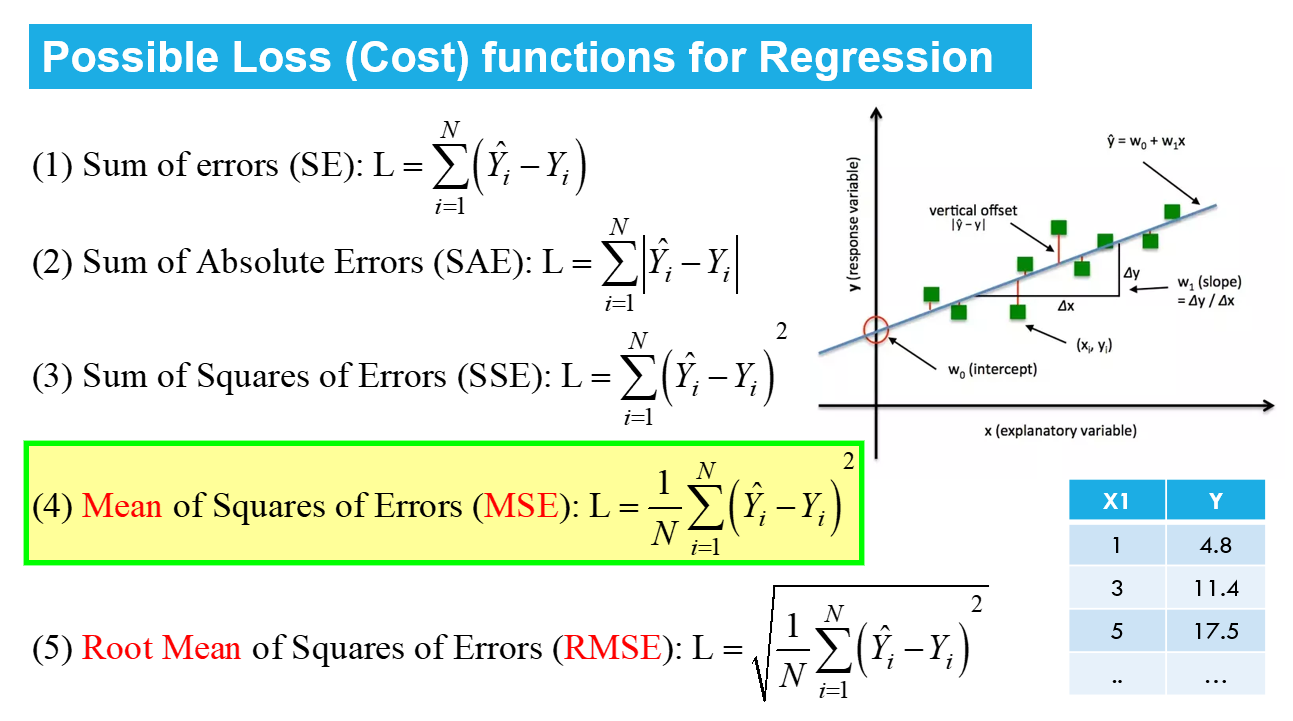
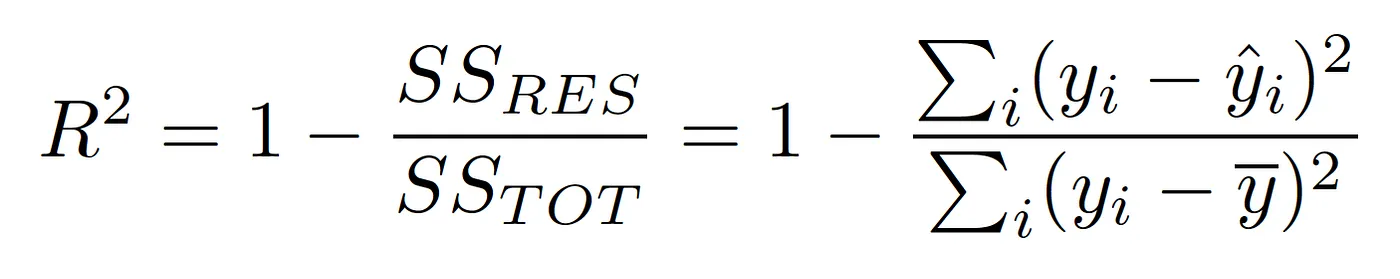

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict) # mean absolute error
mse = mean_squared_error(y_test, y_predict) # mean squarred error
rmse = mean_squared_error(y_test, y_predict, squared=False) # root mean squared error
r2 = r2_score(y_test, y_predict) # r-squared

print(mae)
print(mse)
print(rmse)
print(r2)

4403.001297371504
41785824.673861995
6464.195593719453
0.975716486363513


In [158]:
# Browse model

print(X_test.shape)
# y = w1 * x1 + w2 * x2 + w3 * x3 + ... + w6 * x6

# weight: w1, w2, w3, ..., w6
print(regressor.coef_)
# bias
print(regressor.intercept_)

(10,)
[0.28305083]
48923.312967240796


<hr>

# Find relation between "Marking Spend" and "Profit"

# 1. Browse Data

In [41]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [40]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [43]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# 2. Preprocess Data

## 2-2.Train, Test split

In [196]:
# Select only Marketing Spend to train

X_Marketing_Spend = data["Marketing Spend"]
Y = data.iloc[:, -1]

print(X_Marketing_Spend)
print(Y)

0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing Spend, dtype: float64
0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10

In [197]:
from sklearn.model_selection import train_test_split

random_state = 42 # To create same dataset every time
X_train, X_test, y_train, y_test = train_test_split(X_Marketing_Spend, Y,
                                                    test_size=0.2,
                                                    random_state=random_state) # train: test = 0.8: 0.2

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40,) (40,)
(10,) (10,)


### Do NOT run the cell below

In [195]:
# # Error Handling
# # ValueError: Expected 2D array, got 1D array instead:
#
# print(X_train, X_train.shape)
#
# print("-"*50)
# # should provide the predict method regressor.fit() with 2D array
# # Get values (pd.series -> np.ndarray) -> np.reshape
# # ndarray.reshape(1, -1) : # -1 option : the unspecified value is inferred
# # 2 dimensional array with
# # [[],
# # [],
# # ...,
# # []]
#
# print(type(X_train))
# print(type(X_train.values))
# print(type(X_train.values.reshape(-1, 1)))
# print(X_train.values.reshape(-1, 1), X_train.values.reshape(-1, 1).shape)

12    249839.44
4     366168.42
37    197029.42
8     311613.29
3     383199.62
6     127716.82
41    164470.71
46    297114.46
47         0.00
15    261776.23
9     304981.62
16    264346.06
24    140574.81
34    210797.67
31     88218.23
0     471784.10
44     28334.72
27    353183.81
33    214634.81
5     362861.36
29    107138.38
11    249744.55
36    201126.82
1     443898.53
21    299737.29
2     407934.54
43     35534.17
35    205517.64
23    304768.73
40    172795.67
10    229160.95
22    303319.26
18    294919.57
49     45173.06
20    298664.47
7     323876.68
42    148001.11
14    256512.92
28    118148.20
38    185265.10
Name: Marketing Spend, dtype: float64 (40,)
--------------------------------------------------
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[249839.44]
 [366168.42]
 [197029.42]
 [311613.29]
 [383199.62]
 [127716.82]
 [164470.71]
 [297114.46]
 [     0.  ]
 [261776.23]
 [304981.62]
 [264346.06]
 [140574.81]
 [210797.67]

In [199]:
# # Error Handling
# # ValueError: Expected 2D array, got 1D array instead:

X_train_2d = X_train.values.reshape(-1, 1)
X_test_2d = X_test.values.reshape(-1, 1)

print(X_train_2d, X_train_2d.shape)
print(X_test_2d, X_test_2d.shape)

[[249839.44]
 [366168.42]
 [197029.42]
 [311613.29]
 [383199.62]
 [127716.82]
 [164470.71]
 [297114.46]
 [     0.  ]
 [261776.23]
 [304981.62]
 [264346.06]
 [140574.81]
 [210797.67]
 [ 88218.23]
 [471784.1 ]
 [ 28334.72]
 [353183.81]
 [214634.81]
 [362861.36]
 [107138.38]
 [249744.55]
 [201126.82]
 [443898.53]
 [299737.29]
 [407934.54]
 [ 35534.17]
 [205517.64]
 [304768.73]
 [172795.67]
 [229160.95]
 [303319.26]
 [294919.57]
 [ 45173.06]
 [298664.47]
 [323876.68]
 [148001.11]
 [256512.92]
 [118148.2 ]
 [185265.1 ]] (40, 1)
[[252664.93]
 [174999.3 ]
 [ 91131.24]
 [  1903.93]
 [282574.31]
 [     0.  ]
 [134050.07]
 [137962.62]
 [ 46085.25]
 [     0.  ]] (10, 1)


# with sklearn.linear_model.LinearRegression

# 3. Model Train
## 3-1. Train with sklearn.linear_model.LinearRegression

In [200]:
# sklearn.linear_model.LinearRegression
# is available for simple linear regression and multiple linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_2d, y_train)

LinearRegression()


# 4. Model Prediction
## 4-1. Model test with sklearn.linear_model.LinearRegression

In [201]:
y_predict = regressor.predict(X_test_2d)

print(y_test)
print(y_predict, y_predict.shape)

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64
[120440.33174329  98457.01051638  74718.08631455  49462.22193873
 128906.20665138  48923.31296724  86866.2968753   87973.74740994
  61967.78134498  48923.31296724] (10,)


# 5. Model Evaluate
## 5-1. Model evalutaion with sklearn.linear_model.LinearRegression

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict) # mean absolute error
mse = mean_squared_error(y_test, y_predict) # mean squarred error
rmse = mean_squared_error(y_test, y_predict, squared=False) # root mean squared error
r2 = r2_score(y_test, y_predict) # r-squared

print(mae)
print(mse)
print(rmse)
print(r2)

23639.881154096678
900533964.2328247
30008.898084282013
-0.11205578997827792


In [203]:
# Browse model

print(X_test_2d.shape)
# y = w1 * x1 + w2 * x2 + w3 * x3 + ... + w6 * x6

# weight: w1, w2, w3, ..., w6
print(regressor.coef_)
# bias
print(regressor.intercept_)

(10, 1)
[0.28305083]
48923.312967240796


# with Custom Linear Regression

# 3. Model Train
## 3-1. Custom Linear Regression (Python from scratch)

In [204]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train_custom, X_test_custom, y_train_custom, y_test_custom = X_train.values, X_test.values, y_train.values, y_test.values

print(type(X_train_custom))
print(X_train_custom)
print(X_train_custom.shape)

(40,) (10,) (40,) (10,)
<class 'numpy.ndarray'>
[249839.44 366168.42 197029.42 311613.29 383199.62 127716.82 164470.71
 297114.46      0.   261776.23 304981.62 264346.06 140574.81 210797.67
  88218.23 471784.1   28334.72 353183.81 214634.81 362861.36 107138.38
 249744.55 201126.82 443898.53 299737.29 407934.54  35534.17 205517.64
 304768.73 172795.67 229160.95 303319.26 294919.57  45173.06 298664.47
 323876.68 148001.11 256512.92 118148.2  185265.1 ]
(40,)


# Custom Linear Regression functions get ideas from <a href=https://www.analyticsvidhya.com/blog/2023/01/a-comprehensive-guide-to-ols-regression-part-1/>Reference</a> (Python from scratch)

In [205]:
# Ordinary least squares (OLS)

X_c, Y_c = X_train_custom, y_train_custom
print(X_c) # ndarray
print(Y_c) # ndarray

# weight
w1 = ((X_c * Y_c).mean() - (X_c.mean() * Y_c.mean())) / ((X_c ** 2).mean() - ((X_c.mean()) ** 2))
print(w1)

# bias
w0 = Y_c.mean() - (w1 * X_c.mean())
print(w0)

[249839.44 366168.42 197029.42 311613.29 383199.62 127716.82 164470.71
 297114.46      0.   261776.23 304981.62 264346.06 140574.81 210797.67
  88218.23 471784.1   28334.72 353183.81 214634.81 362861.36 107138.38
 249744.55 201126.82 443898.53 299737.29 407934.54  35534.17 205517.64
 304768.73 172795.67 229160.95 303319.26 294919.57  45173.06 298664.47
 323876.68 148001.11 256512.92 118148.2  185265.1 ]
[141585.52 166187.94  89949.14 152211.77 182901.99 156122.51  77798.83
  49490.75  42559.73 129917.04 149759.96 126992.93 108552.04  96712.8
  97483.56 192261.83  65200.33 105008.31  96778.92 156991.12 101004.64
 144259.4   90708.19 191792.06 111313.02 191050.39  69758.98  96479.51
 108733.99  78239.91 146121.95 110352.25 124266.9   14681.4  118474.03
 155752.6   71498.49 132602.65 103282.38  81229.06]
0.2830508324841535
48923.312967240825


In [206]:
# Compare weight and bias of sklearn.linear_model.LinearRegression

# sklearn.linear_model.LinearRegression
# weight, bias
print(regressor.coef_, regressor.intercept_)

# Custom Linear Regression (Python from scratch)
print(w1, w0)

[0.28305083] 48923.312967240796
0.2830508324841535 48923.312967240825



# 4. Model Prediction
## 4-1. Model test with Custom Linear Regression (Python from scratch)

In [207]:
y_predict_custom = X_test_custom * w1 + w0

print(y_test_custom)
print(y_predict_custom, y_predict_custom.shape)

[134307.35  81005.76  99937.59  64926.08 125370.37  35673.41 105733.54
 107404.34  97427.84 122776.86]
[120440.33174329  98457.01051638  74718.08631455  49462.22193873
 128906.20665138  48923.31296724  86866.2968753   87973.74740994
  61967.78134498  48923.31296724] (10,)


# 5. Model Evaluate
## 5-1. Model evalutaion Custom evaluation function (Python from Scratch)
Images from <a href=https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-algorithms-along-with-their-implementation-in-python-9ec502729dad>Images Reference</a>

### Basic functions

In [208]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Convert ndarray into list
y_test_custom_list = y_test_custom.tolist()
print(y_test_custom_list)
print(type(y_test_custom_list))

# Calculate mean
print(mean(y_test_custom_list))

print("-" * 30)
# numpy.mean()
print(type(y_test_custom))
print(y_test_custom.mean())

[134307.35, 81005.76, 99937.59, 64926.08, 125370.37, 35673.41, 105733.54, 107404.34, 97427.84, 122776.86]
<class 'list'>
97456.31399999998
------------------------------
<class 'numpy.ndarray'>
97456.31399999998


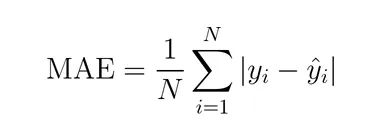

In [212]:
def mae_custom(y_test_custom, y_predict_custom):
    data_count = len(y_test_custom)
    return sum(np.absolute(y_test_custom - y_predict_custom)) / data_count

mae_custom = mae_custom(y_test_custom, y_predict_custom)
print(mae_custom)

23639.881154096664


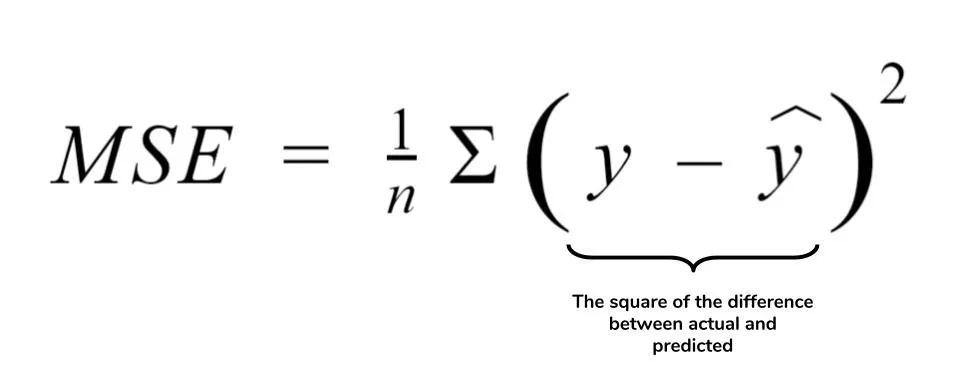

In [219]:
def mse_custom(y_test_custom, y_predict_custom):
    data_count = len(y_test_custom)
    return sum((y_test_custom - y_predict_custom) ** 2) / data_count

mse_custom = mse_custom(y_test_custom, y_predict_custom)
print(mse_custom)

900533964.232824


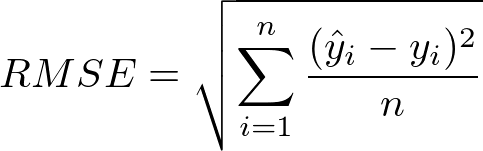

In [213]:
import math

def rmse_custom(y_test_custom, y_predict_custom):
    data_count = len(y_test_custom)
    mse = sum(((y_test_custom - y_predict_custom) ** 2) / data_count)
    # return mse ** 0.5
    # Using python math library
    return math.sqrt(mse)

rmse_custom = rmse_custom(y_test_custom, y_predict_custom)
print(rmse_custom)

30008.898084282


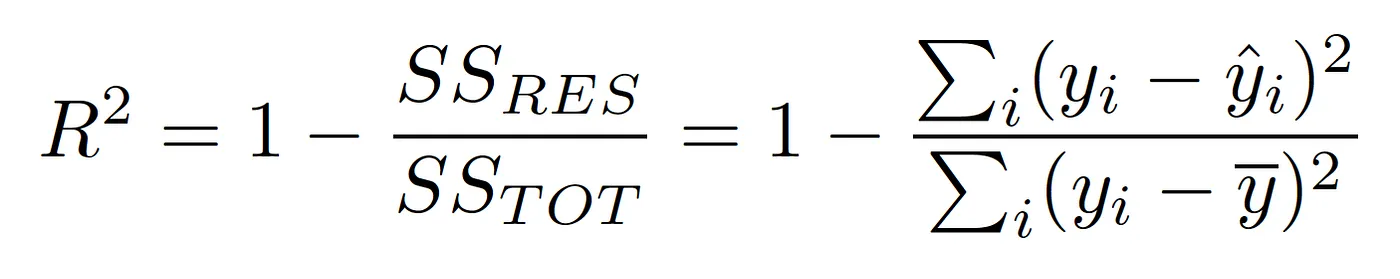
- SSᵣₑₛ = Sum of Square of Residuals
- SSₜₒₜ = Total Sum of Squares

In [215]:
def r2score_custom(y_test_custom, y_predict_custom):
    # Sum of Square of residuals
    SSres = sum((y_test_custom - y_predict_custom) ** 2)
    # TotalSum of Squares
    mean_of_y_test = mean(y_test_custom) # y_test == y_test_custom
    SStot = sum((y_test_custom - mean_of_y_test) ** 2)
    return 1 - (SSres / SStot)

r2score_custom = r2score_custom(y_test_custom, y_predict_custom)
print(r2score_custom)

-0.11205578997827681


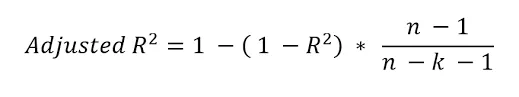
- R² : It is R² Score
- n : Number of Samples in our Dataset
- k : Number of Predictors

In [217]:
def adjusted_r2_custom(y_test_custom, y_predict_custom):
    def r2score_custom(y_test_custom, y_predict_custom):
        # Sum of Square of residuals
        SSres = sum((y_test_custom - y_predict_custom) ** 2)
        # TotalSum of Squares
        mean_of_y_test = mean(y_test_custom) # y_test == y_test_custom
        SStot = sum((y_test_custom - mean_of_y_test) ** 2)
        return 1 - (SSres / SStot)

    n = len(y_test_custom)
    k = len(y_predict_custom)
    r2 = r2score_custom(y_test_custom, y_predict_custom)

    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

adjusted_r2_custom = adjusted_r2_custom(y_test_custom, y_predict_custom)
print(adjusted_r2_custom)

11.00850210980449


## Compare Evaluation Metrics
### sklearn.metrics : mean_absolute_error, mean_squared_error, r2_score
### Custom evaluation functions

In [220]:
print(mae, mae_custom)
print(mse, mse_custom)
print(rmse, rmse_custom)
print(r2, r2score_custom)
print(adjusted_r2_custom)

23639.881154096678 23639.881154096664
900533964.2328247 900533964.232824
30008.898084282013 30008.898084282
-0.11205578997827792 -0.11205578997827681
11.00850210980449
